### Importação dos dados



In [30]:
# Importando biblioteca
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importando CSV via r'github'
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Atribuindo CSV's a variaveis
loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Verificando qtde Colunas, Nomes e Tipos
loja1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


#1. Análise do faturamento


In [24]:
# loja1['Faturamento_Total'] = loja1['Preço'].sum()
# loja1['Faturamento_Total']

# Criando Função de calculo de faturamento e aplicando nas lojas
def calc_faturamento(loja):
  calc = (loja['Preço'] * loja.get('Quantidade', 1)).sum()
  return calc

print('loja1:', calc_faturamento(loja1)) #1.534.509,12
print('loja2:', calc_faturamento(loja2)) #1.488.459,06
print('loja3:', calc_faturamento(loja3)) #1.464.025,03
print('loja4:', calc_faturamento(loja4)) #1.384.497,58

loja1: 1534509.12
loja2: 1488459.06
loja3: 1464025.03
loja4: 1384497.58


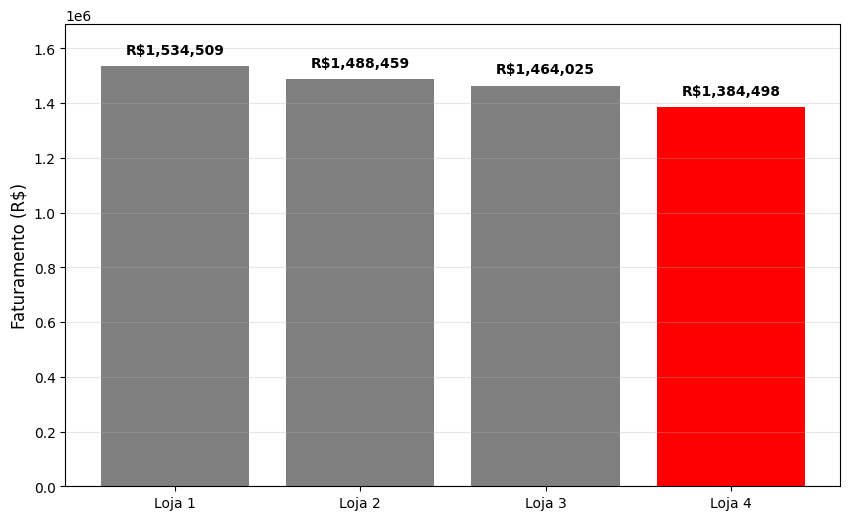

In [47]:
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [calc_faturamento(loja1), calc_faturamento(loja2), calc_faturamento(loja3), calc_faturamento(loja4)]

# Destacar a loja com menor faturamento
cores = ['grey' if f != min(faturamentos) else 'red' for f in faturamentos]

plt.figure(figsize=(10, 6))
bars = plt.bar(lojas, faturamentos, color=cores)
plt.ylabel("Faturamento (R$)", fontsize=12)

# Ajustar limites do eixo Y
y_max = max(faturamentos) * 1.10 # 10% de margem superior
plt.ylim(0, y_max)


for i, valor in enumerate(faturamentos):
    plt.text(i, valor + (y_max * 0.02), f'R${valor:,.0f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')


plt.grid(axis='y', alpha=0.3)
plt.show()

# 2. Vendas por Categoria


In [4]:
# Somando qtde Categoria de cada Loja e concatenando em uma só tabela
categ1 = loja1.value_counts('Categoria do Produto')
categ2 = loja2.value_counts('Categoria do Produto')
categ3 = loja3.value_counts('Categoria do Produto')
categ4 = loja4.value_counts('Categoria do Produto')

categ_all = pd.concat([categ1,categ2,categ3,categ4], axis=1, keys= ['Loja1', 'Loja2', 'Loja3', 'Loja4'])
categ_all



,Loja1,Loja2,Loja3,Loja4
Categoria do Produto,,,,
moveis,465,442,499,480
eletronicos,448,422,451,451
brinquedos,324,313,315,338
eletrodomesticos,312,305,278,254
esporte e lazer,284,275,277,277
instrumentos musicais,182,224,177,170
livros,173,197,185,187
utilidades domesticas,171,181,177,201


<Axes: ylabel='Categoria do Produto'>

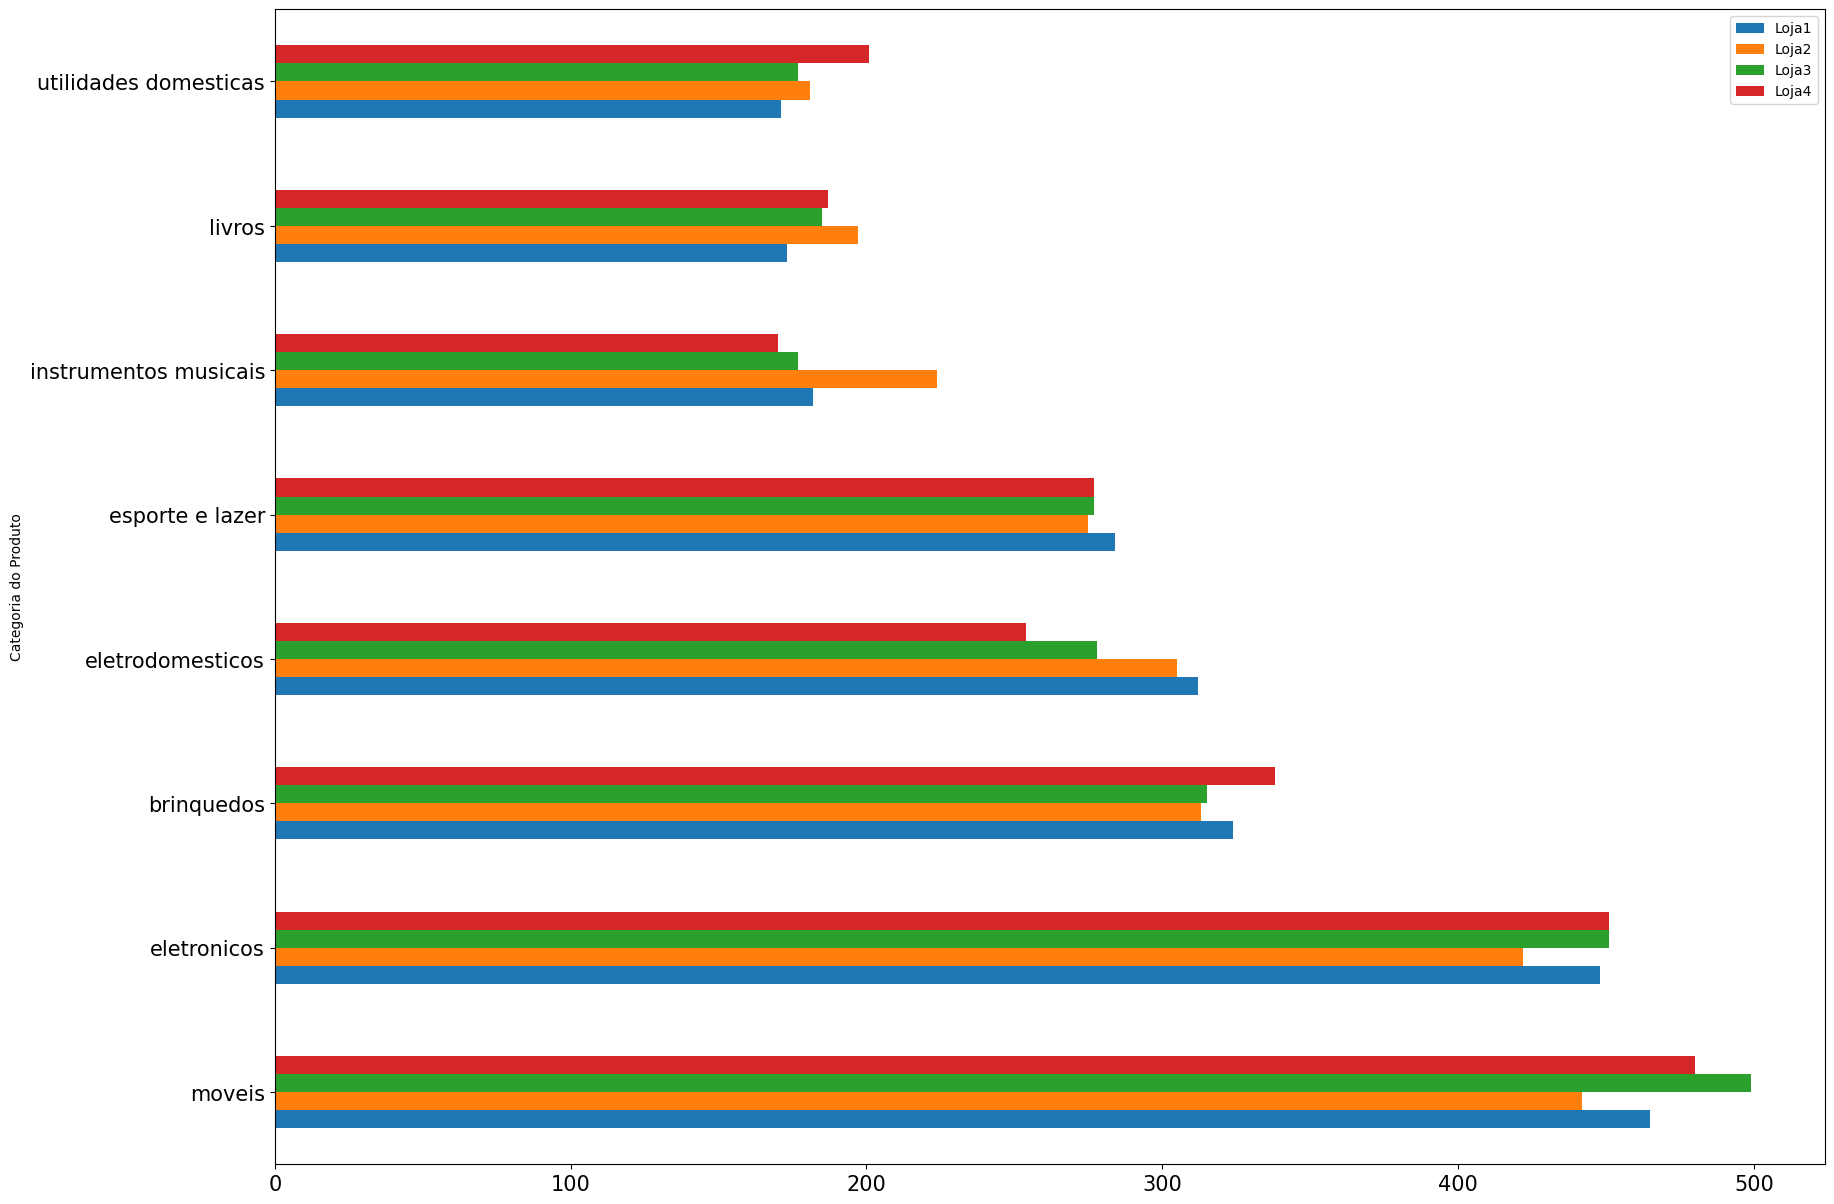

In [5]:
# Plotando um grafico para vizualizar tabela
categ_all.plot(kind='barh', figsize=(20,15), fontsize=15)

# 3. Média de Avaliação das Lojas

In [11]:
# Tirando médias de Avaliação de cada Loja
avaliacao_l1 = loja1['Avaliação da compra'].mean().round(2)
avaliacao_l2 = loja2['Avaliação da compra'].mean().round(2)
avaliacao_l3 = loja3['Avaliação da compra'].mean().round(2)
avaliacao_l4 = loja4['Avaliação da compra'].mean().round(2)

print(f" Primeira Loja: {avaliacao_l1}\n Segunda Loja: {avaliacao_l2}\n Terceira Loja: {avaliacao_l3}\n Quarta Loja: {avaliacao_l4}")

 Primeira Loja: 3.98
 Segunda Loja: 4.04
 Terceira Loja: 4.05
 Quarta Loja: 4.0


# 4. Produtos Mais e Menos Vendidos

In [29]:
vendas_produtos1 = loja1['Produto'].value_counts()
mais_vendidos1 = vendas_produtos1.head(5)
menos_vendidos1 = vendas_produtos1.tail(5)

vendas_produtos2 = loja2['Produto'].value_counts()
mais_vendidos2 = vendas_produtos2.head(5)
menos_vendidos2 = vendas_produtos2.tail(5)

vendas_produtos3 = loja3['Produto'].value_counts()
mais_vendidos3 = vendas_produtos3.head(5)
menos_vendidos3 = vendas_produtos3.tail(5)

vendas_produtos4 = loja4['Produto'].value_counts()
mais_vendidos4 = vendas_produtos4.head(5)
menos_vendidos4 = vendas_produtos4.tail(5)

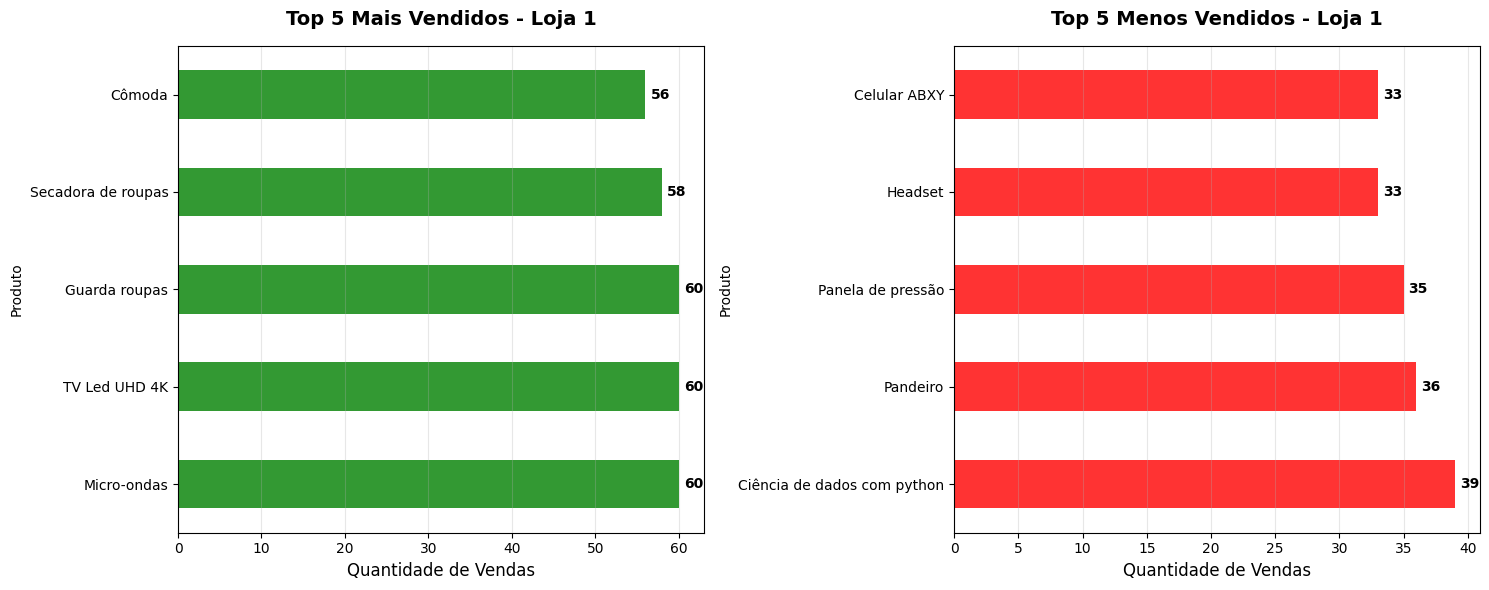

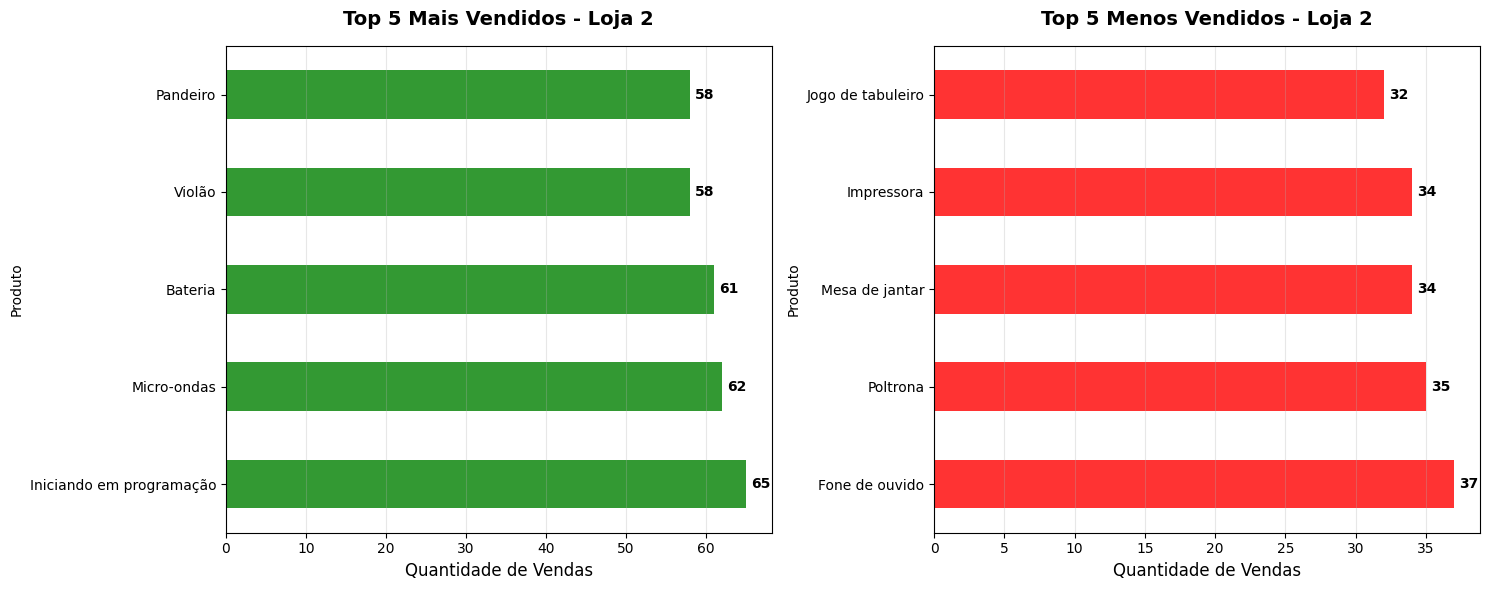

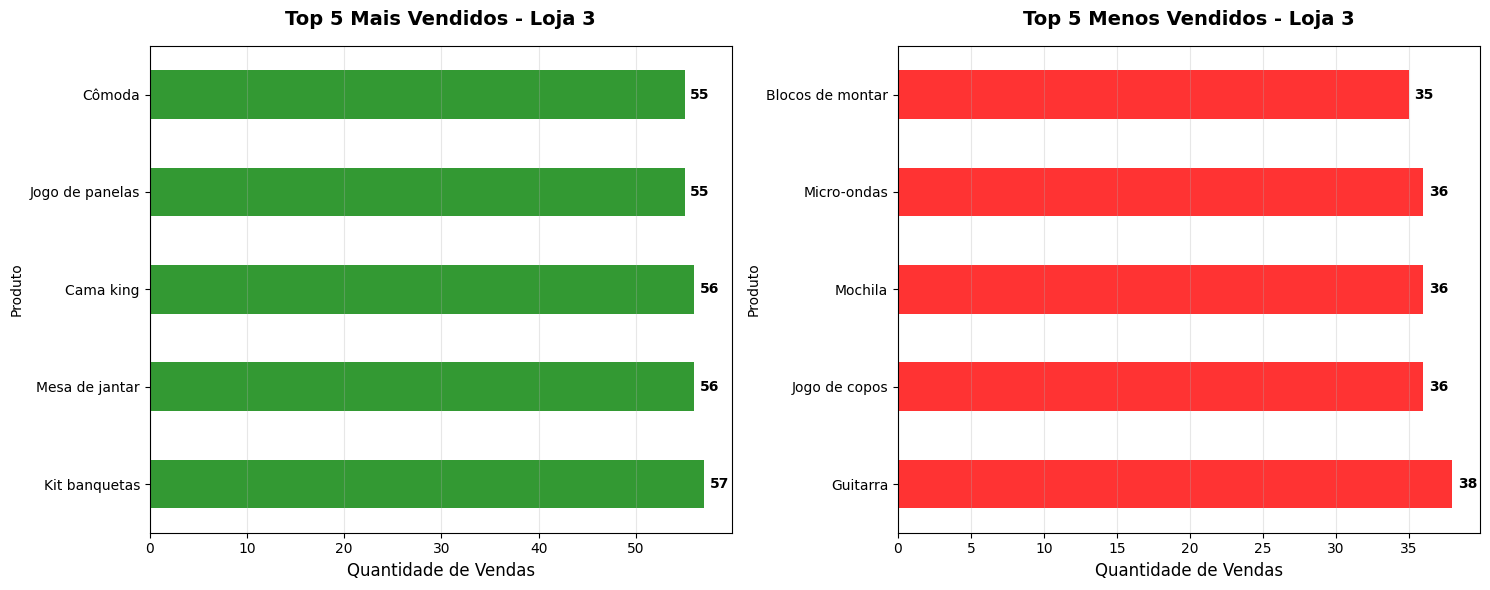

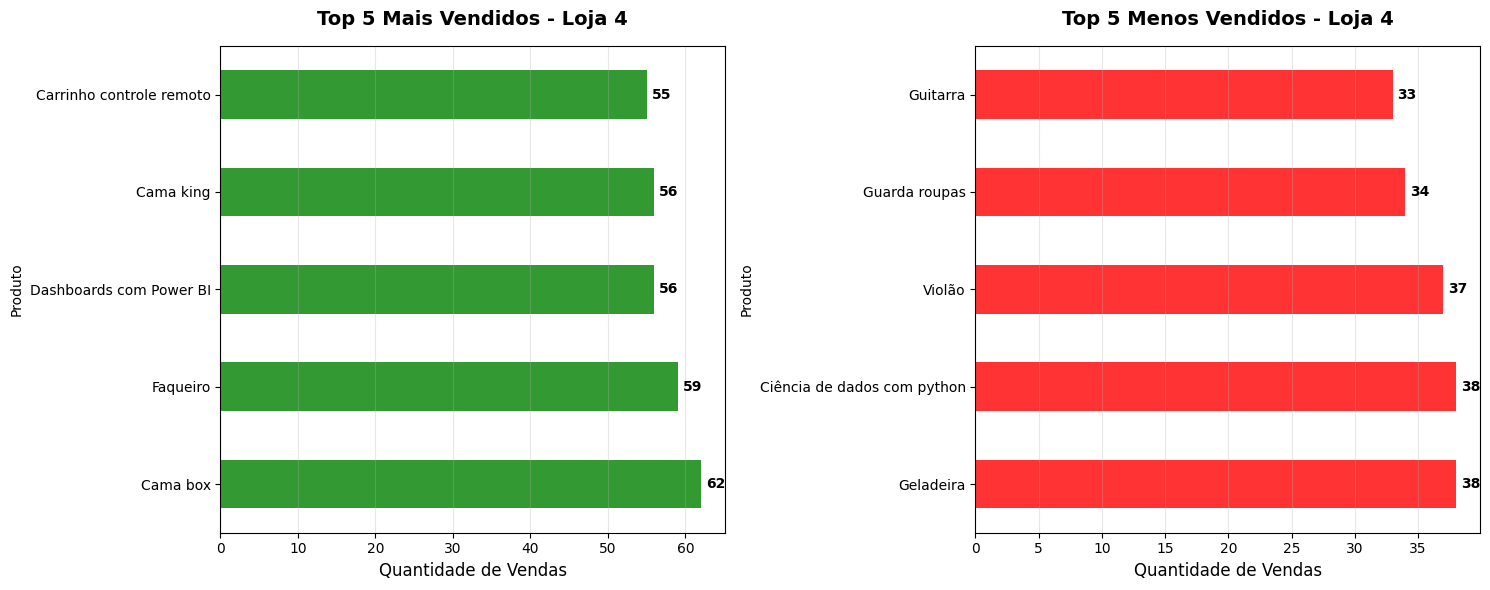

In [36]:
def graficos_loja(loja, mais_vendidos, menos_vendidos):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Mais vendidos
    mais_vendidos.plot(kind='barh', ax=ax1, color='green', alpha=0.8)
    ax1.set_title(f"Top 5 Mais Vendidos - Loja {loja}",
                  fontsize=14, fontweight='bold', pad=15)
    ax1.set_xlabel("Quantidade de Vendas", fontsize=12)
    ax1.grid(axis='x', alpha=0.3)

    # Add valores nas barras
    for i, v in enumerate(mais_vendidos):
        ax1.text(v + max(mais_vendidos)*0.01, i, str(int(v)),
                va='center', fontsize=10, fontweight='bold')

    # Menos vendidos
    menos_vendidos.plot(kind='barh', ax=ax2, color='red', alpha=0.8)
    ax2.set_title(f"Top 5 Menos Vendidos - Loja {loja}",
                  fontsize=14, fontweight='bold', pad=15)
    ax2.set_xlabel("Quantidade de Vendas", fontsize=12)
    ax2.grid(axis='x', alpha=0.3)

    # Add valores nas barras
    for i, v in enumerate(menos_vendidos):
        ax2.text(v + max(menos_vendidos)*0.01, i, str(int(v)),
                va='center', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.show()

# Usar a função para cada loja
graficos_loja(1,mais_vendidos1, menos_vendidos1)
graficos_loja(2,mais_vendidos2, menos_vendidos2)
graficos_loja(3,mais_vendidos3, menos_vendidos3)
graficos_loja(4,mais_vendidos4, menos_vendidos4)


# 5. Frete Médio por Loja


In [38]:
def calc_frete(loja):
  calc = loja['Frete'].mean().round(2)
  return calc

print('loja1:', calc_frete(loja1))
print('loja2:', calc_frete(loja2))
print('loja3:', calc_frete(loja3))
print('loja4:', calc_frete(loja4))

loja1: 34.69
loja2: 33.62
loja3: 33.07
loja4: 31.28


# Relatório de Análise

---

## Análise dos Indicadores

### Faturamento Total
- A **Loja 4** apresentou o menor faturamento entre todas, totalizando **R$1.384.497,58**.
- As lojas 1, 2 e 3 possuem faturamentos totais significativamente superiores e operam em valores semelhantes.

### Faturamento por Categoria
- A **Loja 4** também ficou atrás das demais no faturamento por categoria, com exceção da categoria **"Brinquedos"**, onde teve um leve destaque.
- O gráfico “Faturamento por categorias das lojas” evidencia essa disparidade.

### Avaliações dos Clientes
- As avaliações das lojas apresentaram **baixa variação**, com a maior nota sendo da **Loja 3 (4.05)** e a menor da **Loja 1 (3.98)**.
- Essa estabilidade indica que as avaliações **não são um fator decisivo** para a escolha da loja a ser vendida.

### Frete Médio
- A **Loja 4** possui o **frete médio mais baixo** entre todas, o que poderia ser considerado um ponto positivo.
- No entanto, esse fator **não se traduz em maior faturamento** ou satisfação evidente dos clientes.

---

## Concluindo

Com base nos dados analisados, observa-se que:

- As lojas **1, 2 e 3** operam de forma bastante similar, tanto em faturamento total quanto por categoria.
- A **Loja 4** apresenta **desempenho inferior** em praticamente todos os indicadores, com exceção do frete médio.
- O **frete mais barato** da Loja 4 **não impacta positivamente** em sua performance geral.

---

## Recomendação

Diante dos dados apresentados, recomenda-se que o Senhor João **venda a Loja 4**, por ser a unidade com **menor eficiência operacional** e **menor potencial de retorno**, permitindo assim que ele possa investir em um novo empreendimento com melhores perspectivas.

